In [15]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

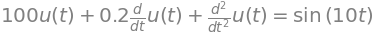

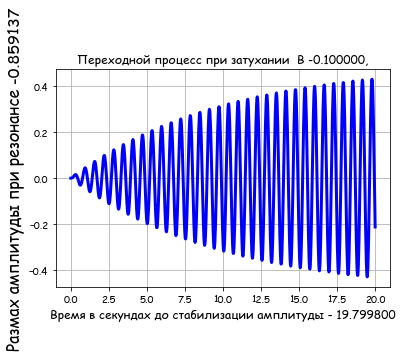

In [33]:
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Comic Sans MS, Arial'

if __name__ == '__main__':
    init_printing(use_latex=True)
    var('t C1 C2')
    u = Function("u")(t)
    
    B=0.1 #затухание
    w=10 #круговая частота
    f=1 #амплитуда силы
    
    diff_equation = Eq(u.diff(t, t) +2 * B * u.diff(t) +w**2* u, f*sin(w*t))
    display(diff_equation)
    
    diff_equation_solution = dsolve(diff_equation,u)
    display(diff_equation_solution)
    
    equation_1 = diff_equation_solution.rhs.subs(t, 0)
    display(equation_1)
    
    equation_2=diff_equation_solution.rhs.diff(t).subs(t, 0)
    display(equation_2)
    
    system_equations = solve([equation_1, equation_2], C1, C2)
    display(system_equations)
    
    res = diff_equation_solution.rhs.subs([(C1,system_equations[C1]), (C2,system_equations[C2])])
    display(res)
    
    to_lambda = lambdify(t, res, "numpy")
    t= np.linspace(0,2*w,1000)
    tt=[ i for i in t if to_lambda(i)==max(to_lambda(t))]
    
    plt.title('Переходной процесс при затухании  B -%f,' % B)
    plt.xlabel('Время в секундах до стабилизации амплитуды - %f' % tt[0], fontsize=12)
    plt.ylabel('Размах амплитуды при резонансе -%f' % (2 * max(to_lambda(t))), fontsize=16)
    plt.plot(t, to_lambda(t), color='b', linewidth=3)
    plt.grid(True)
    plt.show()


    
    
    
    
    